Aprendizaje y conocimiento de los modelos de regresión en el aprendizaje automático

In [1]:
import pandas
dataset = pandas.read_csv("doggy-illness.csv", delimiter="\t")
print(dataset)

    male  attended_training  age  body_fat_percentage  core_temperature  \
0      0                  1  6.9                   38         38.423169   
1      0                  1  5.4                   32         39.015998   
2      1                  1  5.4                   12         39.148341   
3      1                  0  4.8                   23         39.060049   
4      1                  0  4.8                   15         38.655439   
..   ...                ...  ...                  ...               ...   
93     0                  0  4.5                   38         37.939942   
94     1                  0  1.8                   11         38.790426   
95     0                  0  6.6                   20         39.489962   
96     0                  0  6.9                   32         38.575742   
97     1                  1  6.0                   21         39.766447   

    ate_at_tonys_steakhouse  needed_intensive_care  \
0                         0                  

Text(0, 0.5, 'Count')

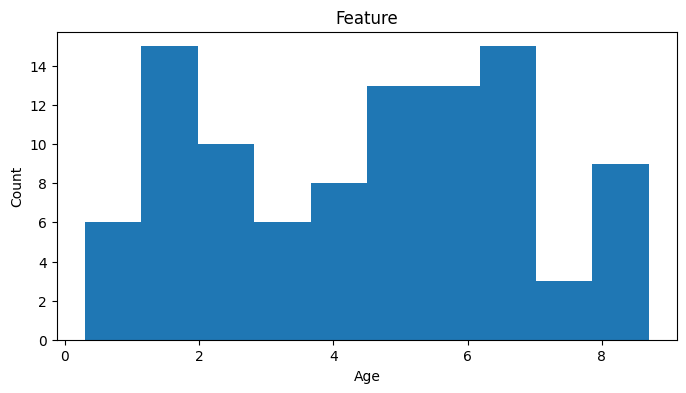

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.hist(dataset['age'],bins =10)
plt.title('Feature')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

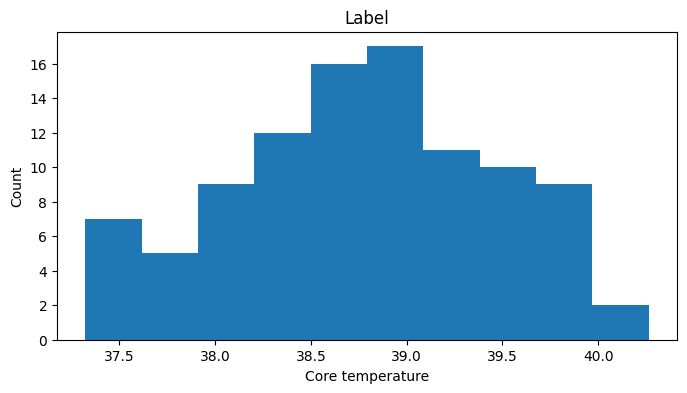

In [3]:
fig = plt.figure(figsize=(8,4))
plt.hist(dataset['core_temperature'],bins =10)
plt.title('Label')
plt.xlabel('Core temperature')
plt.ylabel('Count')

<Axes: title={'center': 'Core temperature as a function of age'}, xlabel='age', ylabel='core_temperature'>

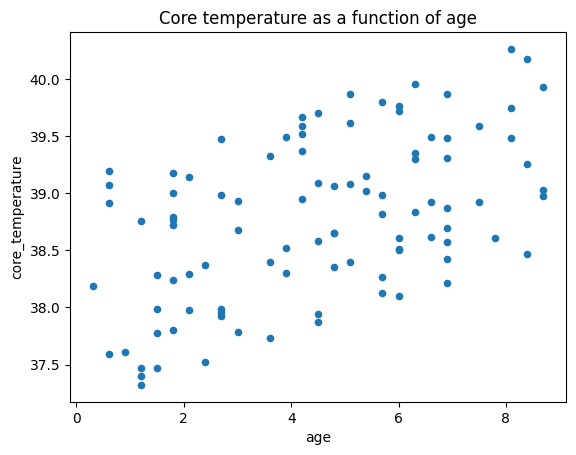

In [4]:
dataset.plot.scatter(title='Core temperature as a function of age', x='age', y='core_temperature')

Simple linear regression

slope: 0.1533
y-intercept: 38.0879
so...
 f(x) = 0.1533x + 38.0879


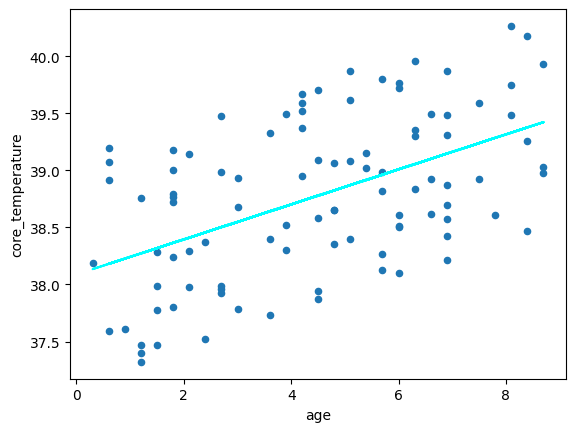

In [5]:
from scipy import stats
df_regression = dataset[['age', 'core_temperature']].copy()
# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['age'], df_regression['core_temperature'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))
# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['age']) + b
# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='age', y='core_temperature')
# Plot the regression line
plt.plot(df_regression['age'],df_regression['fx'], color='cyan')
# Display the plot
plt.show()

In [6]:
import statsmodels.formula.api as smf
formula = "core_temperature ~ age"
model = smf.ols(formula = formula, data = dataset).fit()

def estimate_temperature(age):
    # Model param[0] is the intercepts and param[1] is the slope
    return age * model.params[1] + model.params[0]

print("Estimate temperature from age")
print(estimate_temperature(age=0))

Estimate temperature from age
38.087867548892085


Multiple linear regression model

<Axes: title={'center': 'core_temperature'}, xlabel='male'>

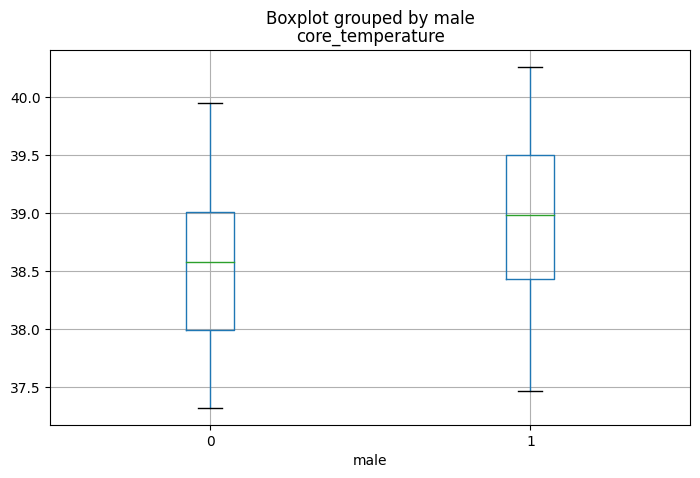

In [7]:
dataset.boxplot(column='core_temperature', by='male', figsize=(8,5))

<Axes: title={'center': 'core_temperature'}, xlabel='attended_training'>

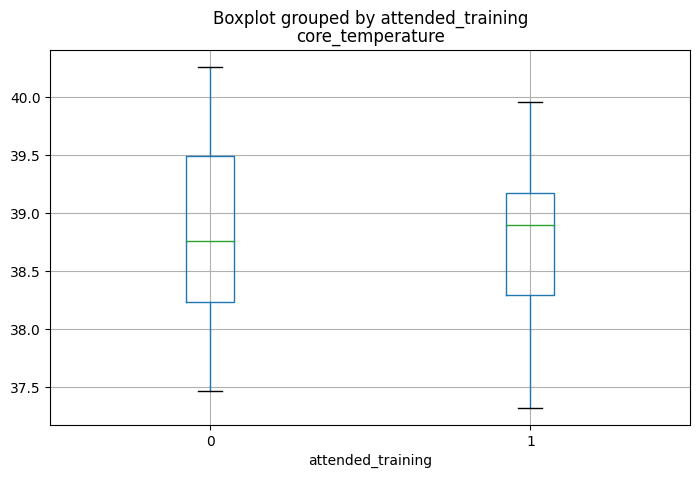

In [8]:
dataset.boxplot(column='core_temperature', by='attended_training', figsize=(8,5))

<Axes: title={'center': 'core_temperature'}, xlabel='ate_at_tonys_steakhouse'>

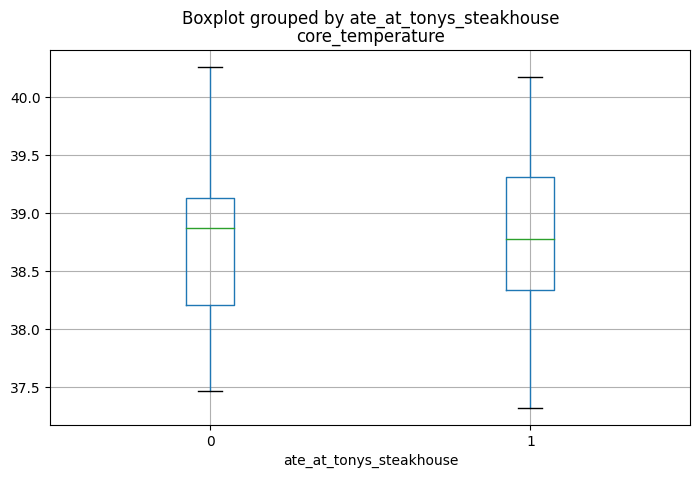

In [9]:
dataset.boxplot(column='core_temperature', by='ate_at_tonys_steakhouse', figsize=(8,5))

<Axes: xlabel='age', ylabel='core_temperature'>

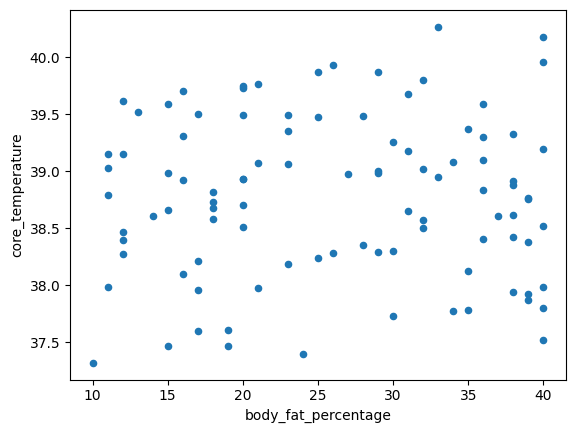

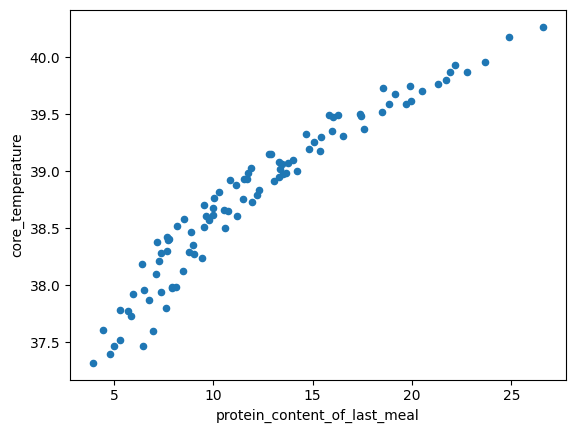

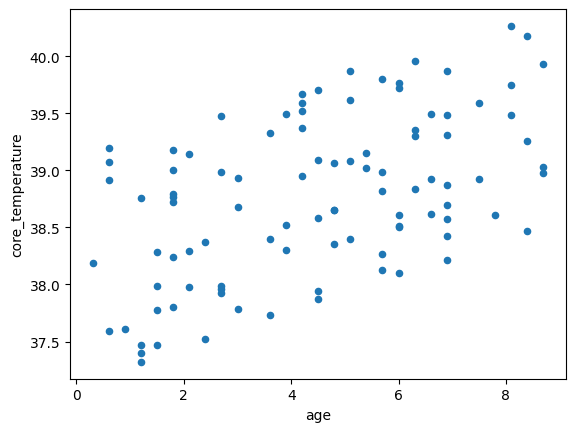

In [10]:
dataset.plot.scatter(x='body_fat_percentage', y='core_temperature')
dataset.plot.scatter(x='protein_content_of_last_meal', y='core_temperature')
dataset.plot.scatter(x='age', y='core_temperature')

In [11]:
import statsmodels.formula.api as smf
for feature in ["male", "age", "protein_content_of_last_meal", "body_fat_percentage"]:
    # Perform linear regression. This method takes care of
    # the entire fitting procedure for us.
    formula = "core_temperature ~ " + feature
    simple_model = smf.ols(formula = formula, data = dataset).fit()

    print(feature)
    print("R-squared:", simple_model.rsquared)

male
R-squared: 0.09990074430719931
age
R-squared: 0.2648116081342463
protein_content_of_last_meal
R-squared: 0.9155158150005704
body_fat_percentage
R-squared: 0.000208090026378005


In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x=dataset[["male", "age", "protein_content_of_last_meal", "body_fat_percentage"]]
y=dataset["core_temperature"]
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

LinearRegression()
Intercept: 
 37.15631624399651
Coefficients: 
 [ 0.01923846  0.02761639  0.12200671 -0.00015605]


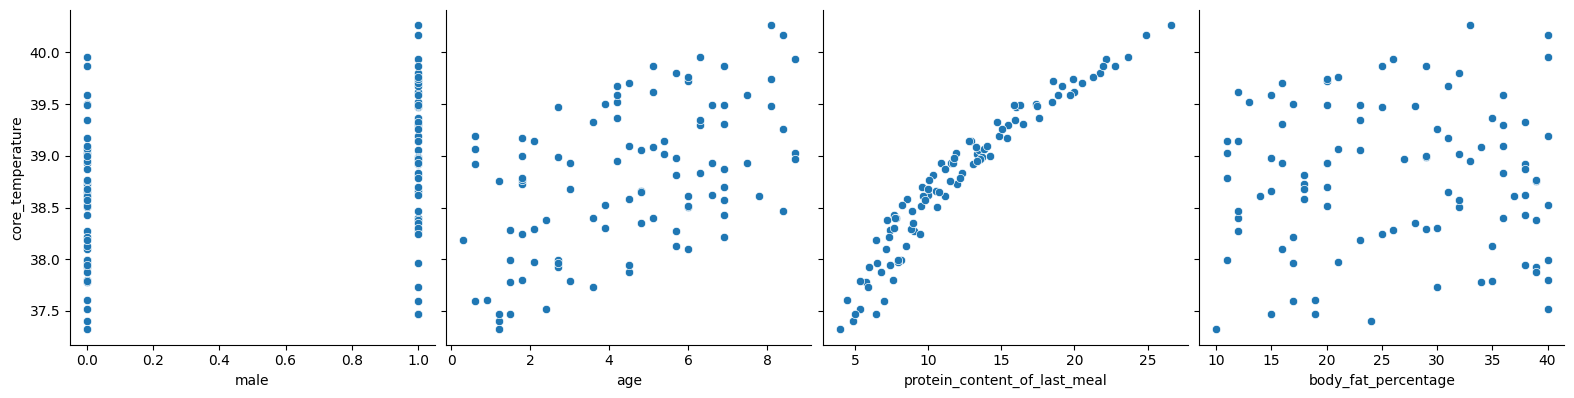

In [14]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

sns.pairplot(dataset, x_vars=["male", "age", "protein_content_of_last_meal", "body_fat_percentage"], y_vars='core_temperature', height=4, aspect=1, kind='scatter')
plt.show()

In [20]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(x, y)
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(x, reg_model.coef_))

#Predicting the Test and Train set result 
y_pred= reg_model.predict(x) 
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Intercept:  37.15631624399651
Mean Absolute Error: 0.1624113390265215
Mean Square Error: 0.03770431033971054
Root Mean Square Error: 0.1941759777616957


In [22]:
model = smf.ols(formula = "core_temperature ~ age + male", data = dataset).fit()

print("R-squared:", model.rsquared)

# Print summary information
model.summary()

R-squared: 0.3148512699768006


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       core_temperature   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.83
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.58e-08
Time:                        19:58:31   Log-Likelihood:                -85.295
No. Observations:                  98   AIC:                             176.6
Df Residuals:                      95   BIC:                             184.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9793      0.135    282.094      0.000      37.712      38.247
age            0.1406      0.026      5.459      0.000       0.089       0.192
male           0.3182      0.121      2.634      0.010       0.078       0.558
==============================================================================
Omnibus:                       21.610   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.227
Skew:                           0.121   Prob(JB):                       0.0733
Kurtosis:                       1.895   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""